# Agenda

* Problem Statement
* Data Understanding and exploration
* Data Imputation
* Visualization
* Standardizing Data
* Model Building
   * Random Forest
   * XGBOOST
   

# Problem Statement:

Business case:

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. I will be creating a predictive model that predicts if an insurance claim is fraudulent or not. The answere between YES/NO


The dataset contains both categorical and numerical columns. Here "ReportedFraud" is our target column, since it has two categories so it is termed to be "Classification Problem" where we need to predict if an insurance claim is fraudulent or not.

In [1]:
# immporting the libraries
import os
import pandas as pd
import numpy as np

# Loading the data

In [2]:
# Read the all Training Dataset
Train_Claim = pd.read_csv("TrainData\Train_Claim.csv")
Train_Demographics = pd.read_csv("TrainData\Train_Demographics.csv")
Train_Policy = pd.read_csv("TrainData\Train_Policy.csv")
Train_Vehicle = pd.read_csv("TrainData\Train_Vehicle.csv")
train_target=pd.read_csv("TrainData\Traindata_with_Target.csv")

In [3]:
#Read The All the Testing Dataset
Test_Claim = pd.read_csv("TestData\Test_Claim.csv")
Test_Demographics = pd.read_csv("TestData\Test_Demographics.csv")
Test_Policy = pd.read_csv("TestData\Test_Policy.csv")
Test_Vehicle = pd.read_csv("TestData\Test_Vehicle.csv")
Test=pd.read_csv("TestData\Test.csv")

In [4]:
Train_Policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [5]:
Train_Vehicle.head(10)

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
5,Cust1801,VehicleID,Vehicle24096
6,Cust30237,VehicleModel,RAM
7,Cust21334,VehicleYOM,1996
8,Cust26634,VehicleYOM,1999
9,Cust20624,VehicleMake,Chevrolet


In [6]:
Train_Demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [7]:
Train_Claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


# Understanding the Data

In [8]:
print('Train_Vehicle:',Train_Vehicle.shape) # check the shape of the Train_vehicle 
print('Test_Vehicle:',Test_Vehicle.shape)  # check the shape of the Test_vehicle 
print('Train_Claim:',Train_Claim.shape) # check the shape of the Train_Claim
print('Train_Demographics:',Train_Demographics.shape)  # check the shape of the Train_Demographics
print('Train_Policy:',Train_Policy.shape)   # check the shape of the Train_policy
print('train_target:',train_target.shape)  # check the shape of the Target variable 

Train_Vehicle: (115344, 3)
Test_Vehicle: (35648, 3)
Train_Claim: (28836, 19)
Train_Demographics: (28836, 10)
Train_Policy: (28836, 10)
train_target: (28836, 2)


In [9]:
print('Test_Vehicle:',Test_Vehicle.shape)  # check the shape of the Test_vehicle 
print('Test_Claim:',Test_Claim.shape)  # check the shape of the Test_vehicle 
print('Test_Demographics:',Test_Demographics.shape)   # check the shape of the Test_Demographics
print('Test_Policy:',Test_Policy.shape)   # check the shape of the Test_policy


Test_Vehicle: (35648, 3)
Test_Claim: (8912, 19)
Test_Demographics: (8912, 10)
Test_Policy: (8912, 10)


since after inspection vehicle attribute and vehicle attribute details have some common relation - applying pivot

In [10]:
Train_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').head(5)


VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10000,Vehicle26917,Audi,A5,2008
Cust10001,Vehicle15893,Audi,A5,2006
Cust10002,Vehicle5152,Volkswagen,Jetta,1999
Cust10003,Vehicle37363,Volkswagen,Jetta,2003
Cust10004,Vehicle28633,Toyota,CRV,2010


In [11]:
Test_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').head(5)


VehicleAttribute,VehicleID,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,,
Cust10008,Vehicle34362,Volkswagen,Passat,1995
Cust10010,Vehicle17046,Nissan,Ultima,2006
Cust10015,Vehicle11038,Suburu,Impreza,2010
Cust10020,Vehicle37114,Accura,TL,2009
Cust1003,Vehicle16771,Dodge,RAM,2007


In [12]:
#reshape the Train_vehicle dataframe
Train_Vehicle=Train_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()


In [13]:
#reshape the Test_Vehi
Test_Vehicle=Test_Vehicle.pivot(index='CustomerID',columns='VehicleAttribute',values='VehicleAttributeDetails').reset_index()


In [14]:
Train_Vehicle.shape  # check the shape of the Train_vehicle after pivot function

(28836, 5)

In [15]:
Test_Vehicle.shape  # check the shape of the Test_vehicle after pivot function

(8912, 5)

# Merging the Data

In [16]:
# Merge the all the training Datasets

Train1 = pd.merge(Train_Claim,Train_Demographics, how ="inner", on='CustomerID')
Train2 = pd.merge(Train1,Train_Policy, how ="inner", on='CustomerID')
Train3 = pd.merge(Train2,Train_Vehicle, how ="inner", on='CustomerID')
Train4 = pd.merge(Train3,train_target, how ="inner", on='CustomerID')
Train_data=Train4

In [17]:
#merge the all testing Datasets
Test1 = pd.merge(Test,Test_Claim, how ="inner", on='CustomerID')
Test2 = pd.merge(Test1,Test_Demographics, how ="inner", on='CustomerID')
Test3 = pd.merge(Test2,Test_Policy, how ="inner", on='CustomerID')
Test4 = pd.merge(Test3,Test_Vehicle, how ="inner", on='CustomerID')
Test_data=Test4

In [18]:
Train_data.shape  # check shape of the training Dataset

(28836, 42)

The dataset contains 28836 rows and 42 columns. Out of 42 columns 41 are independent columns and remaining one is our target variable "ReportedFraud".

In [19]:
Test_data.shape  # check the shape of the Testing Dataset

(8912, 41)

In [20]:
Train_data.columns # checking for column names

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud'],
      dtype='object')

In [21]:
Test_data.columns

Index(['CustomerID', 'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'InsuredAge', 'InsuredZipCode',
       'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation',
       'InsuredHobbies', 'CapitalGains', 'CapitalLoss', 'Country',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')

In [22]:
Train_data.head() # print the first 5 rows

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [23]:
Train_data.tail() # print last 5 rows for training Data

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N
28835,Cust9999,2015-01-13,Single Vehicle Collision,Front Collision,Total Loss,Other,State8,City3,Location 1874,9,...,500/1000,2000,928.43,2909175,husband,Vehicle39163,Suburu,E400,2007,N


In [24]:
Test_data.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,...,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,...,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,...,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,...,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,...,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007


In [25]:
Test_data.tail()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
8907,Cust37942,2015-01-07,Multi-vehicle Collision,?,Total Loss,Police,State9,City7,Location 2000,4,...,State2,100/300,1487,1412.51,0,not-in-family,Vehicle13463,Volkswagen,Jetta,2008
8908,Cust20528,2015-01-13,Multi-vehicle Collision,Rear Collision,Major Damage,Other,State9,City1,Location 1696,8,...,State3,500/1000,2000,1451.31,0,husband,Vehicle34361,Nissan,Jetta,2004
8909,Cust36797,2015-01-06,Multi-vehicle Collision,Side Collision,Total Loss,Ambulance,State8,City3,Location 1931,4,...,State1,100/300,2000,1537.83,0,wife,Vehicle8733,Volkswagen,Jetta,1996
8910,Cust28499,2015-01-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State7,City4,Location 1404,18,...,State1,100/300,2000,1223.43,0,own-child,Vehicle39589,Volkswagen,Jetta,2003
8911,Cust21356,2015-01-10,Multi-vehicle Collision,Front Collision,Total Loss,Ambulance,State9,City1,Location 1696,3,...,State1,500/1000,2000,1475.66,0,own-child,Vehicle16648,Ford,Jetta,2004


In [26]:
Train_data.dtypes # Datatype for eacch variable

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [27]:
Test_data.dtypes # Datatype for eacch variable

CustomerID                     object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                    int64
NumberOfVehicles                int64
PropertyDamage                 object
BodilyInjuries                  int64
Witnesses                      object
PoliceReport                   object
AmountOfTotalClaim             object
AmountOfInjuryClaim             int64
AmountOfPropertyClaim           int64
AmountOfVehicleDamage           int64
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss 

In [28]:
for col in Train_data.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(Train_data[col].value_counts().head(10)) #Return a series containing counts of unique values

----------------------------------------CustomerID---------------------------------------- - 

Cust10000    1
Cust33397    1
Cust33356    1
Cust33354    1
Cust33353    1
Cust33352    1
Cust33351    1
Cust33350    1
Cust33349    1
Cust33348    1
Name: CustomerID, dtype: int64

----------------------------------------DateOfIncident---------------------------------------- - 

2015-01-10    661
2015-01-18    657
2015-02-17    648
2015-01-17    647
2015-01-09    646
2015-01-11    629
2015-01-16    623
2015-01-19    619
2015-01-08    610
2015-01-20    604
Name: DateOfIncident, dtype: int64

----------------------------------------TypeOfIncident---------------------------------------- - 

Multi-vehicle Collision     11966
Single Vehicle Collision    11677
Vehicle Theft                2685
Parked Car                   2508
Name: TypeOfIncident, dtype: int64

----------------------------------------TypeOfCollission---------------------------------------- - 

Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64

----------------------------------------SeverityOfIncident---------------------------------------- - 

Minor Damage      10400
Total Loss         8218
Major Damage       7671
Trivial Damage     2547
Name: SeverityOfIncident, dtype: int64

----------------------------------------AuthoritiesContacted---------------------------------------- - 

Police       8324
Fire         6518
Ambulance    5732
Other        5570
None         2692
Name: AuthoritiesContacted, dtype: int64

----------------------------------------IncidentState---------------------------------------- - 

State5    7886
State7    7168
State9    6161
State8    3181
State4    3029
State6     810
State3     601
Name: IncidentState, dtype: int64

----------------------------------------IncidentCity---------------------------------------- - 

City2    4486
City1    4374
City4    4311
City7    4216
City3    4073
City5    3698
City6    3678
Name: IncidentCity, dtype: int64

----------------------------------------IncidentAddress---------------------------------------- - 

Location 1341    73
Location 1254    72
Location 1227    71
Location 2006    70
Location 1136    68
Location 1192    67
Location 1321    66
Location 1375    66
Location 1223    66
Location 1469    65
Name: IncidentAddress, dtype: int64

----------------------------------------IncidentTime---------------------------------------- - 

16    1616
17    1615
6     1564
15    1541
14    1461
5     1434
13    1420
18    1419
4     1406
12    1363
Name: IncidentTime, dtype: int64

----------------------------------------NumberOfVehicles---------------------------------------- - 

1    16169
3     9711
2     2276
4      680
Name: NumberOfVehicles, dtype: int64

----------------------------------------PropertyDamage---------------------------------------- - 

?      10459
NO      9687
YES     8690
Name: PropertyDamage, dtype: int64

----------------------------------------BodilyInjuries---------------------------------------- - 

1    11072
0     9087
2     8677
Name: BodilyInjuries, dtype: int64

----------------------------------------Witnesses---------------------------------------- - 

2               8449
1               8345
0               6128
3               5868
MISSINGVALUE      46
Name: Witnesses, dtype: int64

----------------------------------------PoliceReport---------------------------------------- - 

NO     9898
?      9805
YES    9133
Name: PoliceReport, dtype: int64

----------------------------------------AmountOfTotalClaim---------------------------------------- - 

MISSEDDATA    50
6820          12
5400           8
60600          8
55000          7
5399           7
63900          6
5191           6
5257           6
4620           6
Name: AmountOfTotalClaim, dtype: int64

----------------------------------------AmountOfInjuryClaim---------------------------------------- - 

0      68
480    51
640    34
580    19
536    17
532    17
740    17
531    16
600    16
654    16
Name: AmountOfInjuryClaim, dtype: int64

----------------------------------------AmountOfPropertyClaim---------------------------------------- - 

0       35
580     17
578     16
606     16
506     15
1240    15
490     14
717     14
650     13
461     13
Name: AmountOfPropertyClaim, dtype: int64

----------------------------------------AmountOfVehicleDamage---------------------------------------- - 

2560     19
5040     12
28000    11
3600      8
3290      8
3933      8
4317      7
3680      7
41999     7
48160     7
Name: AmountOfVehicleDamage, dtype: int64

----------------------------------------InsuredAge---------------------------------------- - 

34    1469
38    1419
37    1401
39    1365
36    1311
40    1307
35    1302
33    1295
32    1262
41    1244
Name: InsuredAge, dtype: int64

----------------------------------------InsuredZipCode---------------------------------------- - 

446895    100
612904     72
476198     71
608331     70
440961     70
477695     69
457555     68
432711     66
433184     66
478456     62
Name: InsuredZipCode, dtype: int64

----------------------------------------InsuredGender---------------------------------------- - 

FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

----------------------------------------InsuredEducationLevel---------------------------------------- - 

JD             4808
High School    4583
MD             4161
Masters        4141
Associate      4125
PhD            3556
College        3462
Name: InsuredEducationLevel, dtype: int64

----------------------------------------InsuredOccupation---------------------------------------- - 

machine-op-inspct    2798
prof-specialty       2362
tech-support         2268
priv-house-serv      2176
exec-managerial      2148
sales                2133
craft-repair         2130
transport-moving     2079
armed-forces         2032
other-service        1965
Name: InsuredOccupation, dtype: int64

----------------------------------------InsuredHobbies---------------------------------------- - 

bungie-jumping    1751
paintball         1688
camping           1681
kayaking          1611
exercise          1589
reading           1586
movies            1529
yachting          1486
hiking            1483
base-jumping      1470
Name: InsuredHobbies, dtype: int64

----------------------------------------CapitalGains---------------------------------------- - 

0        15819
44000      142
51500      130
55600      125
75800      121
63600      113
46300      112
49900      101
51400       92
68500       91
Name: CapitalGains, dtype: int64

----------------------------------------CapitalLoss---------------------------------------- - 

 0        14759
-53800      166
-31700      148
-61400      145
-53700      138
-32800      131
-45100      128
-45300      124
-50300      120
-45800      118
Name: CapitalLoss, dtype: int64

----------------------------------------Country---------------------------------------- - 

India    28834
Name: Country, dtype: int64

----------------------------------------InsurancePolicyNumber---------------------------------------- - 

119121    1
142518    1
142477    1
142475    1
142474    1
142473    1
142472    1
142471    1
142470    1
142469    1
Name: InsurancePolicyNumber, dtype: int64

----------------------------------------CustomerLoyaltyPeriod---------------------------------------- - 

255    146
254    145
212    136
154    134
239    131
124    127
210    126
258    125
286    124
257    124
Name: CustomerLoyaltyPeriod, dtype: int64

----------------------------------------DateOfPolicyCoverage---------------------------------------- - 

1998-11-11    38
1995-08-19    32
1999-05-23    28
2001-06-10    27
2005-06-17    27
1997-05-15    26
1997-02-03    26
2004-06-15    25
1993-08-05    25
2001-09-29    24
Name: DateOfPolicyCoverage, dtype: int64

----------------------------------------InsurancePolicyState---------------------------------------- - 

State3    10146
State1     9716
State2     8974
Name: InsurancePolicyState, dtype: int64

----------------------------------------Policy_CombinedSingleLimit---------------------------------------- - 

250/500     8260
100/300     8050
500/1000    7000
250/300     1024
100/500      962
250/1000     953
500/500      872
500/300      868
100/1000     847
Name: Policy_CombinedSingleLimit, dtype: int64

----------------------------------------Policy_Deductible---------------------------------------- - 

500     5292
2000    5270
1000    5064
647       28
722       27
908       26
950       26
641       26
964       25
999       25
Name: Policy_Deductible, dtype: int64

----------------------------------------PolicyAnnualPremium---------------------------------------- - 

-1.00       141
 1310.77      7
 1310.78      6
 1285.77      5
 1226.29      5
 1298.80      5
 1278.14      5
 1168.02      5
 1334.47      5
 1315.68      5
Name: PolicyAnnualPremium, dtype: int64

----------------------------------------UmbrellaLimit---------------------------------------- - 

0          21073
6000000      313
5000000      139
7000000      115
4000000       71
9000000       17
3000000        9
8000000        7
2000000        3
4234331        2
Name: UmbrellaLimit, dtype: int64

----------------------------------------InsuredRelationship---------------------------------------- - 

own-child         5242
not-in-family     5222
other-relative    5153
husband           5002
wife              4224
unmarried         3993
Name: InsuredRelationship, dtype: int64

----------------------------------------VehicleID---------------------------------------- - 

Vehicle26917    1
Vehicle25995    1
Vehicle7056     1
Vehicle37761    1
Vehicle16919    1
Vehicle36019    1
Vehicle20870    1
Vehicle11556    1
Vehicle11759    1
Vehicle31556    1
Name: VehicleID, dtype: int64

----------------------------------------VehicleMake---------------------------------------- - 

Saab          2415
Suburu        2313
Nissan        2300
Dodge         2263
Chevrolet     2174
Ford          2158
Accura        2099
BMW           2073
Toyota        1981
Volkswagen    1960
Name: VehicleMake, dtype: int64

----------------------------------------VehicleModel---------------------------------------- - 

RAM           1344
Wrangler      1261
A3            1102
MDX           1054
Jetta         1037
Neon           928
Pathfinder     919
Passat         888
Legacy         887
92x            859
Name: VehicleModel, dtype: int64

----------------------------------------VehicleYOM---------------------------------------- - 

2007    1730
2004    1691
2010    1686
2006    1680
2008    1655
2009    1655
2005    1653
2003    1606
2011    1581
2002    1551
Name: VehicleYOM, dtype: int64

----------------------------------------ReportedFraud---------------------------------------- - 

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

In [29]:
# Checking null values
Train_data.isnull().sum()

CustomerID                     0
DateOfIncident                 0
TypeOfIncident                 0
TypeOfCollission               0
SeverityOfIncident             0
AuthoritiesContacted           0
IncidentState                  0
IncidentCity                   0
IncidentAddress                0
IncidentTime                   0
NumberOfVehicles               0
PropertyDamage                 0
BodilyInjuries                 0
Witnesses                      0
PoliceReport                   0
AmountOfTotalClaim             0
AmountOfInjuryClaim            0
AmountOfPropertyClaim          0
AmountOfVehicleDamage          0
InsuredAge                     0
InsuredZipCode                 0
InsuredGender                 30
InsuredEducationLevel          0
InsuredOccupation              0
InsuredHobbies                 0
CapitalGains                   0
CapitalLoss                    0
Country                        2
InsurancePolicyNumber          0
CustomerLoyaltyPeriod          0
DateOfPoli

In [30]:
Train_data.nunique().to_frame("No of Unique Values") #finding Unnique values

,No of Unique Values
CustomerID,28836
DateOfIncident,72
TypeOfIncident,4
TypeOfCollission,4
SeverityOfIncident,4
AuthoritiesContacted,5
IncidentState,7
IncidentCity,7
IncidentAddress,1000
IncidentTime,25


In [31]:
#Dropping Unimportant Column
Train_data.drop(['CustomerID','PolicyAnnualPremium','UmbrellaLimit','InsurancePolicyNumber','VehicleID','Country','InsuredZipCode','DateOfIncident','DateOfPolicyCoverage'],axis=1,inplace=True)


In [32]:
#Dropping Unimportant Column
Test_data.drop(['CustomerID','PolicyAnnualPremium','UmbrellaLimit','InsurancePolicyNumber','VehicleID','Country','InsuredZipCode','DateOfIncident','DateOfPolicyCoverage'],axis=1,inplace=True)


In [33]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   TypeOfIncident              28836 non-null  object
 1   TypeOfCollission            28836 non-null  object
 2   SeverityOfIncident          28836 non-null  object
 3   AuthoritiesContacted        28836 non-null  object
 4   IncidentState               28836 non-null  object
 5   IncidentCity                28836 non-null  object
 6   IncidentAddress             28836 non-null  object
 7   IncidentTime                28836 non-null  int64 
 8   NumberOfVehicles            28836 non-null  int64 
 9   PropertyDamage              28836 non-null  object
 10  BodilyInjuries              28836 non-null  int64 
 11  Witnesses                   28836 non-null  object
 12  PoliceReport                28836 non-null  object
 13  AmountOfTotalClaim          28836 non-null  ob

This gives the information about the dataset which includes indexing type, column type, non-null values and memory usage.


In [34]:
#replace the all the missing data with NaN for training Dataset

Train_data= Train_data.replace('MISSEDDATA', np.NaN)
Train_data= Train_data.replace(5, np.NaN)
Train_data= Train_data.replace(-1, np.NaN)
Train_data= Train_data.replace('MISSINGVALUE', np.NaN)
Train_data= Train_data.replace('???', np.NaN)
Train_data= Train_data.replace('?', np.NaN)

In [35]:
#replace the all the missing data with NaN for Testing Dataset

Test_data= Test_data.replace('MISSEDDATA', np.NaN)
Test_data= Test_data.replace(-5, np.NaN)
Test_data= Test_data.replace(-1, np.NaN)
Test_data= Test_data.replace('MISSINGVALUE', np.NaN)
Test_data= Test_data.replace('???', np.NaN)
Test_data= Test_data.replace('?', np.NaN)

In [36]:
Train_data.isnull().sum()  # Checking for Null Values 

TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                   1434
NumberOfVehicles                  0
PropertyDamage                10459
BodilyInjuries                    0
Witnesses                        46
PoliceReport                   9805
AmountOfTotalClaim               50
AmountOfInjuryClaim               1
AmountOfPropertyClaim             0
AmountOfVehicleDamage             0
InsuredAge                        0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
CustomerLoyaltyPeriod            14
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible           

In [37]:
Test_data.isnull().sum()

TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles                 0
PropertyDamage                3199
BodilyInjuries                   0
Witnesses                       12
PoliceReport                  3014
AmountOfTotalClaim               8
AmountOfInjuryClaim              0
AmountOfPropertyClaim            0
AmountOfVehicleDamage            0
InsuredAge                       0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
CustomerLoyaltyPeriod            0
InsurancePolicyState             0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
InsuredRelationship 

# DATA IMPUTATION 

Creating categorical and numerical dataframe and imputing numerical with mean and categorical with mode and combining both

In [38]:
# Separating numerical and categorcal columns

categorical_col=[]
numerical_col=[]
for i in Train_data.dtypes.index:
    if Train_data.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("Numerical columns are:\n",numerical_col)


Categorical columns are:
 ['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud']
Numerical columns are:
 ['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible']


In [39]:
Train_colm=Train_data[['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud']]
Train_Num=Train_data[['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible']]

In [40]:
Train_colm = Train_colm.fillna(Train_colm.mode().iloc[0])
Train_Num = Train_Num.fillna(Train_Num.mean())
Train_both = pd.concat([Train_colm, Train_Num], axis = 1)

In [41]:
# Separating numerical and categorcal columns

categorical_column=[]
numerical_column=[]
for i in Test_data.dtypes.index:
    if Test_data.dtypes[i]=='object':
        categorical_column.append(i)
    else:
        numerical_column.append(i)
print("Categorical columns are:\n",categorical_column)
print("Numerical columns are:\n",numerical_column)


Categorical columns are:
 ['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM']
Numerical columns are:
 ['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible']


In [42]:
Test_colm=Test_data[['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM']]
Test_Num=Test_data[['IncidentTime', 'NumberOfVehicles', 'BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod', 'Policy_Deductible']]

In [43]:
#replace null values using mode and Mean operation
Test_colm = Test_colm.fillna(Test_colm.mode().iloc[0])
Test_Num = Test_Num.fillna(Test_Num.mean())
Test_both = pd.concat([Test_colm, Test_Num], axis = 1)

In [44]:
Train_dataset=pd.DataFrame(Train_both)

In [45]:
Test_dataset=pd.DataFrame(Test_both)

In [46]:
Train_dataset.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
PropertyDamage                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
InsuredRelationship           0
VehicleMake                   0
VehicleModel                  0
VehicleYOM                    0
ReportedFraud                 0
IncidentTime                  0
NumberOfVehicles              0
BodilyInjuries                0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
CapitalGains                  0
CapitalLoss                   0
Customer

In [47]:
Test_dataset.isnull().sum()

TypeOfIncident                0
TypeOfCollission              0
SeverityOfIncident            0
AuthoritiesContacted          0
IncidentState                 0
IncidentCity                  0
IncidentAddress               0
PropertyDamage                0
Witnesses                     0
PoliceReport                  0
AmountOfTotalClaim            0
InsuredGender                 0
InsuredEducationLevel         0
InsuredOccupation             0
InsuredHobbies                0
InsurancePolicyState          0
Policy_CombinedSingleLimit    0
InsuredRelationship           0
VehicleMake                   0
VehicleModel                  0
VehicleYOM                    0
IncidentTime                  0
NumberOfVehicles              0
BodilyInjuries                0
AmountOfInjuryClaim           0
AmountOfPropertyClaim         0
AmountOfVehicleDamage         0
InsuredAge                    0
CapitalGains                  0
CapitalLoss                   0
CustomerLoyaltyPeriod         0
Policy_D

# Visualization

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


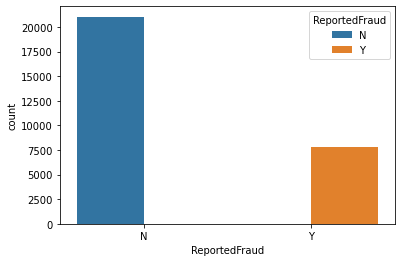

In [49]:
ax = sns.countplot(x='ReportedFraud', data=Train_dataset, hue='ReportedFraud') #it shows the distribution of target variable

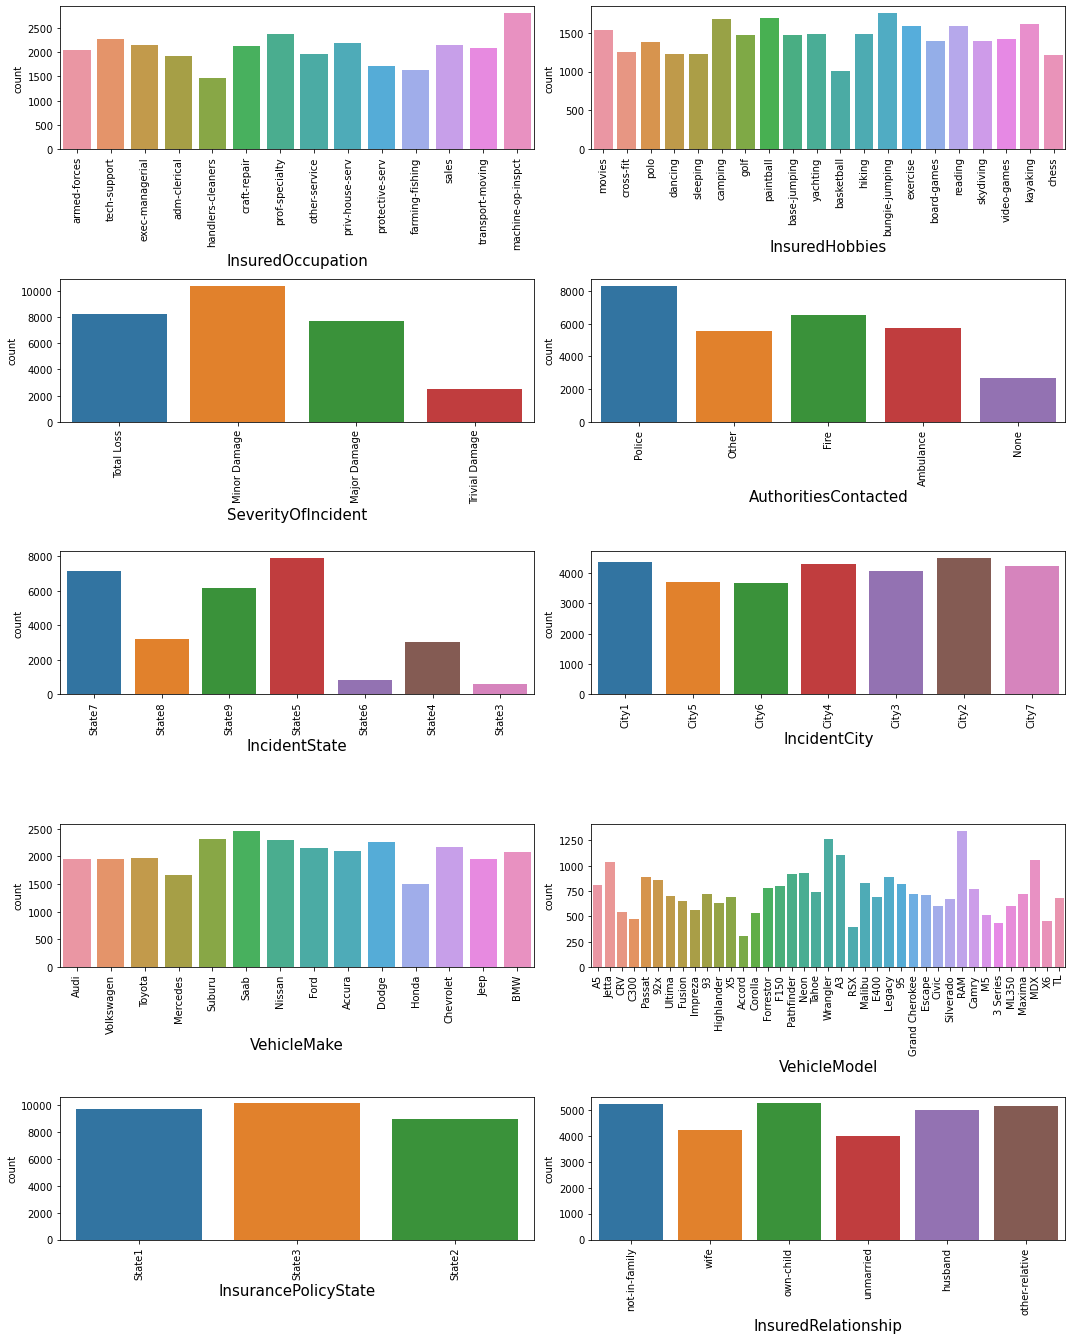

In [50]:
cols2 = ['InsuredOccupation', 'InsuredHobbies', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity','VehicleMake', 'VehicleModel','InsurancePolicyState','InsuredRelationship']

plt.figure(figsize=(15,25))
plotnumber=1
for column in cols2:
    if plotnumber:
        ax=plt.subplot(7,2,plotnumber)
        sns.countplot(Train_dataset[column])
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

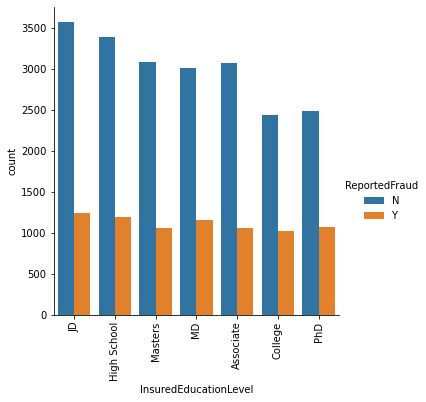

In [51]:
# Comparing InsuredEducationLevel and ReportedFraud

sns.catplot('InsuredEducationLevel',kind='count',data=Train_dataset,hue='ReportedFraud')
plt.xticks(rotation=90)
plt.show()

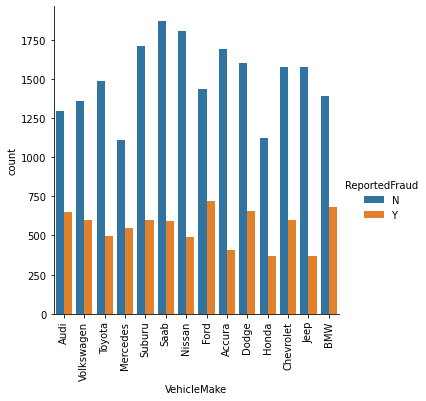

In [52]:
# Comparing VehicleMake and ReportedFraud
sns.catplot('VehicleMake',kind='count',data=Train_dataset,hue='ReportedFraud')
plt.xticks(rotation=90)
plt.show()

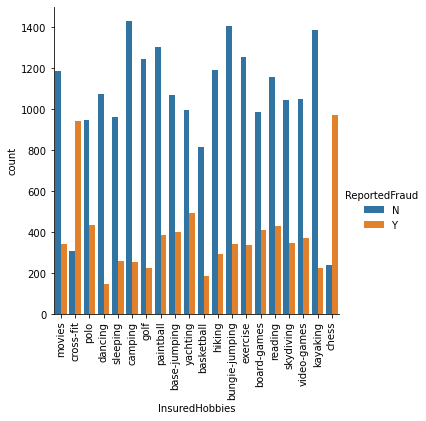

In [53]:
# Comparing InsuredHobbies and ReportedFraud
sns.catplot('InsuredHobbies',kind='count',data=Train_dataset,hue='ReportedFraud')
plt.xticks(rotation=90)
plt.show()

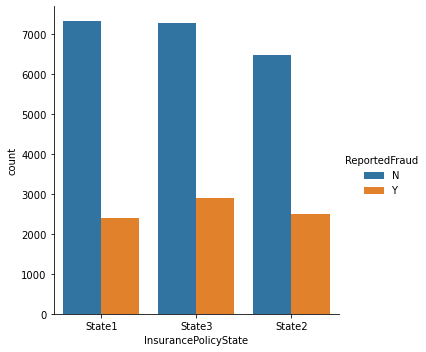

In [54]:
# Comparing InsuredHobbies and ReportedFraud
sns.catplot('InsurancePolicyState',kind='count',data=Train_dataset,hue='ReportedFraud')
plt.show()

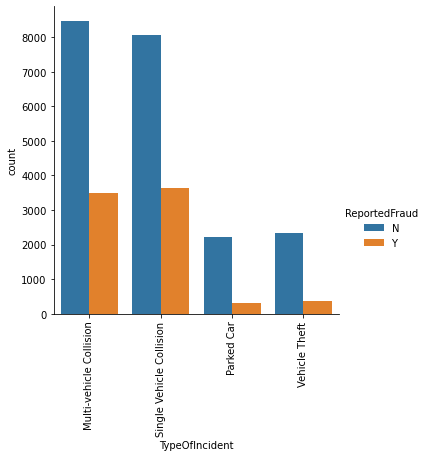

In [55]:
# Comparing incident_type and fraud_reported
sns.catplot('TypeOfIncident',kind='count',data=Train_dataset,hue='ReportedFraud')
plt.xticks(rotation=90)
plt.show()

In [57]:
Train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TypeOfIncident              28836 non-null  object 
 1   TypeOfCollission            28836 non-null  object 
 2   SeverityOfIncident          28836 non-null  object 
 3   AuthoritiesContacted        28836 non-null  object 
 4   IncidentState               28836 non-null  object 
 5   IncidentCity                28836 non-null  object 
 6   IncidentAddress             28836 non-null  object 
 7   PropertyDamage              28836 non-null  object 
 8   Witnesses                   28836 non-null  object 
 9   PoliceReport                28836 non-null  object 
 10  AmountOfTotalClaim          28836 non-null  object 
 11  InsuredGender               28836 non-null  object 
 12  InsuredEducationLevel       28836 non-null  object 
 13  InsuredOccupation           288

In [58]:
# Conversion of all the categorical columns into an numerical column for Training Dataset
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()


In [59]:
td=['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident','IncidentTime','AmountOfInjuryClaim','CustomerLoyaltyPeriod','AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit', 'InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud']

In [60]:
Train_dataset[td] = Train_dataset[td].apply(LabelEncoder().fit_transform)

In [61]:
Train_dataset.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,...,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible
0,0,2,2,4,4,0,279,0,0,0,...,3,1,10002,6071,46013,35,56700,-48500,47,1000
1,0,2,2,4,4,4,279,1,1,1,...,3,2,11292,5919,39903,36,70600,-48500,112,1000
2,2,2,1,3,5,5,980,1,3,0,...,1,2,8626,11630,43495,33,66400,-63700,165,617
3,2,2,1,3,6,5,980,1,3,0,...,1,2,8925,12003,42237,36,47900,-73400,188,722
4,2,1,1,1,5,5,624,0,1,1,...,1,2,6333,7234,37481,29,0,-41500,113,500


In [62]:
Train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   TypeOfIncident              28836 non-null  int32
 1   TypeOfCollission            28836 non-null  int32
 2   SeverityOfIncident          28836 non-null  int32
 3   AuthoritiesContacted        28836 non-null  int32
 4   IncidentState               28836 non-null  int32
 5   IncidentCity                28836 non-null  int32
 6   IncidentAddress             28836 non-null  int32
 7   PropertyDamage              28836 non-null  int32
 8   Witnesses                   28836 non-null  int32
 9   PoliceReport                28836 non-null  int32
 10  AmountOfTotalClaim          28836 non-null  int32
 11  InsuredGender               28836 non-null  int32
 12  InsuredEducationLevel       28836 non-null  int32
 13  InsuredOccupation           28836 non-null  int32
 14  Insure

In [63]:
td=['TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim', 'InsuredGender', 'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState', 'Policy_CombinedSingleLimit','IncidentTime','CustomerLoyaltyPeriod','InsuredRelationship', 'VehicleMake', 'VehicleModel', 'VehicleYOM']

In [64]:
Test_dataset[td] = Test_dataset[td].apply(LabelEncoder().fit_transform) 
# conversion from categorical to numerical for testing dataset

In [65]:
Test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   TypeOfIncident              8912 non-null   int32
 1   TypeOfCollission            8912 non-null   int32
 2   SeverityOfIncident          8912 non-null   int32
 3   AuthoritiesContacted        8912 non-null   int32
 4   IncidentState               8912 non-null   int32
 5   IncidentCity                8912 non-null   int32
 6   IncidentAddress             8912 non-null   int32
 7   PropertyDamage              8912 non-null   int32
 8   Witnesses                   8912 non-null   int32
 9   PoliceReport                8912 non-null   int32
 10  AmountOfTotalClaim          8912 non-null   int32
 11  InsuredGender               8912 non-null   int32
 12  InsuredEducationLevel       8912 non-null   int32
 13  InsuredOccupation           8912 non-null   int32
 14  InsuredH

In [66]:
Test_dataset.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,...,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible
0,0,0,1,0,2,1,311,0,0,0,...,3,0,6835,8059,53460,27,56400,-57000,84,2000
1,2,1,1,1,6,4,337,0,1,0,...,1,1,8113,5240,41917,40,56700,-65600,232,500
2,0,1,1,4,2,1,931,0,1,0,...,3,0,7490,9110,42915,39,30400,0,218,1000
3,3,1,3,2,4,4,400,0,1,0,...,1,2,494,866,3581,38,68500,0,205,2000
4,0,1,1,4,2,1,826,0,3,0,...,3,2,7700,3850,23100,29,35100,0,134,2000


In [67]:
# Statistical summary of numerical columns
Train_dataset.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
TypeOfIncident,28836.0,1.176203,1.077662,0.0,0.00,1.0,2.00,3.0
TypeOfCollission,28836.0,1.021536,0.723641,0.0,0.00,1.0,2.00,2.0
SeverityOfIncident,28836.0,1.195624,0.930636,0.0,0.00,1.0,2.00,3.0
AuthoritiesContacted,28836.0,2.146900,1.532150,0.0,1.00,2.0,4.00,4.0
IncidentState,28836.0,3.564087,1.782101,0.0,2.00,4.0,5.00,6.0
IncidentCity,28836.0,2.914517,2.018866,0.0,1.00,3.0,5.00,6.0
IncidentAddress,28836.0,495.843460,286.495611,0.0,248.00,492.0,742.00,999.0
PropertyDamage,28836.0,0.301359,0.458856,0.0,0.00,0.0,1.00,1.0
Witnesses,28836.0,1.489076,1.040160,0.0,1.00,1.0,2.00,3.0
PoliceReport,28836.0,0.316722,0.465206,0.0,0.00,0.0,1.00,1.0


In [68]:
Train_dataset['ReportedFraud'].value_counts()
# it shows the number of unique values in the target variable


0    21051
1     7785
Name: ReportedFraud, dtype: int64

# Standardizing the data 


In [69]:
Train_dataset.shape

(28836, 33)

In [70]:
# Splitting the dataset into Features and Target
X = Train_dataset.drop("ReportedFraud",axis=1)
y = Train_dataset["ReportedFraud"]

In [71]:
X.shape  #shape of the feature 

(28836, 32)

In [72]:
# normalization for the training Dataset
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X_train_norm = norm.transform(X)
X_train = pd.DataFrame(X_train_norm, columns = X.columns) # retaining columns names
X_train.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,...,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible
0,0.000000,1.0,0.666667,1.00,0.666667,0.000000,0.279279,0.0,0.000000,0.0,...,0.666667,0.5,0.836497,0.256485,0.577765,0.355556,0.564179,0.563456,0.098326,0.333333
1,0.000000,1.0,0.666667,1.00,0.666667,0.666667,0.279279,1.0,0.333333,1.0,...,0.666667,1.0,0.944384,0.250063,0.500862,0.377778,0.702488,0.563456,0.234310,0.333333
2,0.666667,1.0,0.333333,0.75,0.833333,0.833333,0.980981,1.0,1.000000,0.0,...,0.000000,1.0,0.721418,0.491339,0.546072,0.311111,0.660697,0.426643,0.345188,0.078000
3,0.666667,1.0,0.333333,0.75,1.000000,0.833333,0.980981,1.0,1.000000,0.0,...,0.000000,1.0,0.746425,0.507098,0.530239,0.377778,0.476617,0.339334,0.393305,0.148000
4,0.666667,0.5,0.333333,0.25,0.833333,0.833333,0.624625,0.0,0.333333,1.0,...,0.000000,1.0,0.529648,0.305619,0.470378,0.222222,0.000000,0.626463,0.236402,0.000000


In [73]:
#Normalization for the testing Dataset
norm1 = MinMaxScaler().fit(Test_dataset)
Test_norm = norm1.transform(Test_dataset)
Test_dataset = pd.DataFrame(Test_norm, columns = Test_dataset.columns) # retaining columns names
Test_dataset.head()

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,PropertyDamage,Witnesses,PoliceReport,...,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible
0,0.000000,0.0,0.333333,0.00,0.333333,0.166667,0.312563,0.0,0.000000,0.0,...,0.666667,0.0,0.325647,0.342965,0.687218,0.177778,0.561194,0.486949,0.176842,1.000000
1,0.666667,0.5,0.333333,0.25,1.000000,0.666667,0.338693,0.0,0.333333,0.0,...,0.000000,0.5,0.386536,0.222998,0.538641,0.466667,0.564179,0.409541,0.488421,0.000000
2,0.000000,0.5,0.333333,1.00,0.333333,0.166667,0.935678,0.0,0.333333,0.0,...,0.666667,0.0,0.356854,0.387693,0.551487,0.444444,0.302488,1.000000,0.458947,0.333333
3,1.000000,0.5,1.000000,0.50,0.666667,0.666667,0.402010,0.0,0.333333,0.0,...,0.000000,1.0,0.023536,0.036854,0.045192,0.422222,0.681592,1.000000,0.431579,1.000000
4,0.000000,0.5,0.333333,1.00,0.333333,0.166667,0.830151,0.0,1.000000,0.0,...,0.666667,1.0,0.366859,0.163844,0.296435,0.222222,0.349254,1.000000,0.282105,1.000000


In [79]:
enconter=pd.read_csv('Sample_Submission.csv')

In [80]:
enconter1=enconter['CustomerID']

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=0.6,n_jobs = -1,random_state =42)

In [83]:
%time rfc.fit(X_train,y)

CPU times: total: 41.6 s
Wall time: 5.55 s


RandomForestClassifier(criterion='entropy', max_features=0.6, n_jobs=-1,
                       random_state=42)

In [84]:
train_predictions = rfc.predict(X_train)

In [85]:
print('\nRandom forest  Performance:')
print('------------------------')
print('F1 Score        : ', metrics.f1_score(y, train_predictions,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y, train_predictions))
print('Classification_report:\n ', classification_report(y, train_predictions))


Random forest  Performance:
------------------------
F1 Score        :  0.9999306422527396
Confusion Matrix:
  [[21051     0]
 [    2  7783]]
Classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     21051
           1       1.00      1.00      1.00      7785

    accuracy                           1.00     28836
   macro avg       1.00      1.00      1.00     28836
weighted avg       1.00      1.00      1.00     28836



In [86]:
test_prediction=rfc.predict(Test_dataset)

Saving the comparison file as a csv file.

In [87]:
pred1 = pd.DataFrame({'CustomerID':enconter1,'ReportedFraud':test_prediction}).to_csv('RandomForest100.csv')

# XG BOOST

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [89]:
xgbc = XGBClassifier(random_state = 42)


In [90]:
xgbc.fit(X_train, y)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [91]:
y_pred_xgbc = xgbc.predict(X_train)


In [92]:
print('\nXG BOOST:')
print('------------------------')
print('F1 Score        : ', metrics.f1_score(y, y_pred_xgbc,average='micro'))
print('Confusion Matrix:\n ', confusion_matrix(y, y_pred_xgbc))
print('Classification_report:\n ', classification_report(y, y_pred_xgbc))


XG BOOST:
------------------------
F1 Score        :  0.9525593008739076
Confusion Matrix:
  [[20748   303]
 [ 1065  6720]]
Classification_report:
                precision    recall  f1-score   support

           0       0.95      0.99      0.97     21051
           1       0.96      0.86      0.91      7785

    accuracy                           0.95     28836
   macro avg       0.95      0.92      0.94     28836
weighted avg       0.95      0.95      0.95     28836



In [93]:
Xgboostpred=xgbc.predict(Test_dataset)

Saving the comparison file as a csv file.

In [94]:
Xgboostpredd = pd.DataFrame({'CustomerID':enconter1,'ReportedFraud':Xgboostpred}).to_csv('Prediction_file.csv')